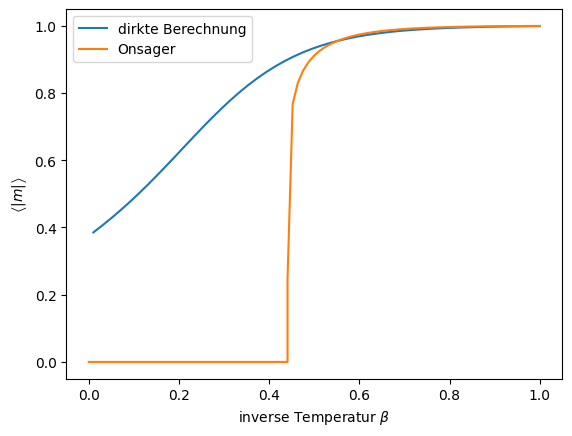

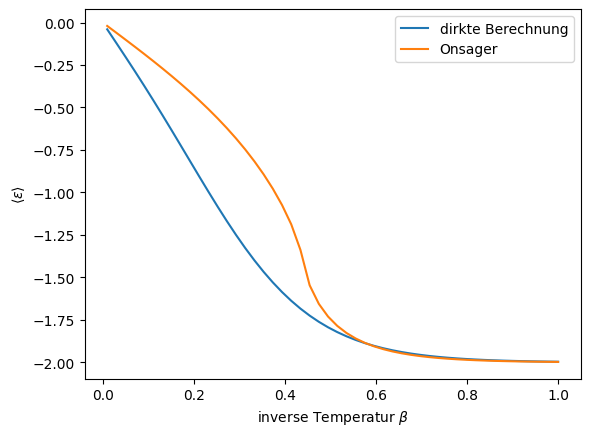

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
# Gitterkantenlänge
L = 2
# Temperaturskalen
b= np.linspace(0.01,1)
b1 = np.linspace(0.440688,1)
b12 = np.linspace(0,0.440688)
# Spin-Gitter
sg = np.zeros((L,L))
sg[::]=1
# def Randbedingungen
def rb(a):
    result = np.zeros((L+2,L+2))
    result[1:-1,1:-1]=a
    result[0,:]=result[-2,:]
    result[-1,:]=result[1,:]
    result[:,0]=result[:,-2]
    result[:,-1]=result[:,1]
    return result

# def Hamiltonian
def Ham(a):
    H = []
    for i in range(1,L+1):
        for j in range(1,L+1):
            H.append(a[i,j]*(a[i-1,j]+a[i+1,j]+a[i,j-1]+a[i,j+1]))
    return -sum(H)/2
    
    
# def Zustandssumme
Z= np.zeros((2**(L**2),len(b)))
# iteriere durch das Gitter in dem ich wie beim zählen, das kleinste Glied forwährend verändere und jede höhere ebenen mit einer Frequenz des 
# Inhalts der unteren Ebenen

# Iteriere über alle Möglichkeiten 
for n in range(0,2**(L**2)):
    for i in range(1,1+L):
        for j in range(1,1+L):
            # Gitter wird als eine Kette gesehen. Jedes Glied ändert sich mit einer Frequenz die der Anzahl an möglichen Konfiguration aller 
            # unteren Kettenglieder entspricht
            sg[i-1,j-1]=(-1)**(n//2**((i-1)*L+(j-1)))
    Z[n,:] = np.exp(-b*Ham(rb(sg)))
Z = np.sum(Z,axis=0)


def mean_energy():
    mean_H = np.zeros((2**(L**2),len(b)))
    for n in range(0,2**(L**2)):
        for i in range(1,1+L):
            for j in range(1,1+L):
                sg[i-1,j-1]=(-1)**(n//2**((i-1)*L+(j-1)))
        mean_H[n,:] = Ham(rb(sg))*np.exp(-b*Ham(rb(sg)))/Z
    return np.sum(mean_H,axis=0)/L**2



def mean_mag():
    mean_m = np.zeros((2**(L**2),len(b)))
    for n in range(0,2**(L**2)):
        for i in range(1,1+L):
            for j in range(1,1+L):
                sg[i-1,j-1]=(-1)**(n//(2**((i-1)*L+(j-1))))
        mean_m[n,:] = np.abs(np.sum(sg))*np.exp(-b*Ham(rb(sg)))/Z
        
    return np.sum(mean_m,axis=0)/L**2


m = mean_mag()
e = mean_energy()

b2= b1
# Onsager Kurve wird berechnet über die Ellipsenfunktionen aus scipy
def K(arg):
    store =[]
    for i in range(len(arg)):
        store.append(sc.ellipk(arg[i]))
    return np.array(store)
def xip2(beta):
    return 4*(np.tanh(2*beta)/np.cosh(2*beta))**2


m_ana = (1-1/np.sinh(2*b1)**4)**(1/8)
# außerhalb der ferromagnetischen Phase ist die Magnetisierung 0
m_ana = np.concatenate((b12*0,m_ana))
B1 = np.concatenate((b12,b1))
# Onsager energie wird berechnet
e_ana= -1/np.tanh(2*b)*(1+(2*np.tanh(2*b)**2-1)*2/np.pi*sc.ellipk(xip2(b)))

# Die Kurven werden geplottet
fig, ax = plt.subplots(1,1)
ax.plot(b,m)
ax.plot(B1,m_ana)
ax.set_xlabel(r"inverse Temperatur $\beta$")
ax.set_ylabel(r"$\left\langle{|m|}\right\rangle $")
ax.legend(["dirkte Berechnung","Onsager"],loc=2)
fig2, ax2 = plt.subplots(1,1)
ax2.plot(b,e)
ax2.plot(b,e_ana)
ax2.set_xlabel(r"inverse Temperatur $\beta$")
ax2.set_ylabel(r"$\left\langle\epsilon\right\rangle $")
ax2.legend(["dirkte Berechnung","Onsager"])
plt.show()
